In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from google.colab import files
import pandas as pd

# Step 1: Upload the file from your local machine
uploaded = files.upload()

# Step 2: Read the CSV file into a pandas DataFrame
# Assuming the file is named 'my_excel.csv', replace it with your actual file name
# The original code tried to assign the dataframe to 'my_excel.csv', which is invalid syntax.
# Instead, assign it to a variable name like 'my_excel_data':
my_excel_data = pd.read_csv('my_excel.csv') # Changed this line to assign to a variable

# Step 3: Display the first few rows of the DataFrame
# Also, 'fifa_data' was not defined. Assuming you want to display the uploaded data:
my_excel_data.head() # Changed this line to use the assigned variable

Saving my_excel.csv to my_excel.csv


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [11]:
import random

#  Function to replace invalid heights with random values between 150 and 180
def replace_invalid_heights(my_excel_data, Height):
    for index, value in my_excel_data[Height].items():
        # Check if the value is invalid (non-numeric or None)
        if not isinstance(value, (int, float)) or value < 150 or value > 180:
            # Replace with a random height between 150 and 180
            my_excel_data.at[index, Height] = random.randint(150, 180)

# Apply the function to replace heights
replace_invalid_heights(my_excel_data, 'Height')

# Verify the changes
print(my_excel_data)

              Name            Team  Number Position  Age Height  Weight  \
0    Avery Bradley  Boston Celtics       0       PG   25    166     180   
1      Jae Crowder  Boston Celtics      99       SF   25    154     235   
2     John Holland  Boston Celtics      30       SG   27    161     205   
3      R.J. Hunter  Boston Celtics      28       SG   22    164     185   
4    Jonas Jerebko  Boston Celtics       8       PF   29    176     231   
..             ...             ...     ...      ...  ...    ...     ...   
453   Shelvin Mack       Utah Jazz       8       PG   26    175     203   
454      Raul Neto       Utah Jazz      25       PG   24    156     179   
455   Tibor Pleiss       Utah Jazz      21        C   26    178     256   
456    Jeff Withey       Utah Jazz      24        C   26    175     231   
457       Priyanka       Utah Jazz      34        C   25    164     231   

               College     Salary  
0                Texas  7730337.0  
1            Marquette  679

In [12]:
# Step 1: Count the number of employees in each team
team_counts = my_excel_data['Team'].value_counts()

# Step 2: Calculate the total number of employees
total_employees = len(my_excel_data)

# Step 3: Calculate the percentage split for each team
team_percentage = (team_counts / total_employees) * 100

# Step 4: Combine the counts and percentages into a summary table
team_distribution = pd.DataFrame({
    'Employee Count': team_counts,
    'Percentage of Total': team_percentage
})

# Step 5: Print the summary table
print(team_distribution)

                        Employee Count  Percentage of Total
Team                                                       
New Orleans Pelicans                19             4.148472
Memphis Grizzlies                   18             3.930131
Utah Jazz                           16             3.493450
New York Knicks                     16             3.493450
Milwaukee Bucks                     16             3.493450
Brooklyn Nets                       15             3.275109
Portland Trail Blazers              15             3.275109
Oklahoma City Thunder               15             3.275109
Denver Nuggets                      15             3.275109
Washington Wizards                  15             3.275109
Miami Heat                          15             3.275109
Charlotte Hornets                   15             3.275109
Atlanta Hawks                       15             3.275109
San Antonio Spurs                   15             3.275109
Houston Rockets                     15  

In [13]:
# Step 1: Segregate employees based on their positions
position_counts = my_excel_data['Position'].value_counts()

# Step 2: (Optional) Calculate the percentage of employees in each position
total_employees = len(my_excel_data)
position_percentage = (position_counts / total_employees) * 100

# Step 3: Combine the counts and percentages into a summary table
position_distribution = pd.DataFrame({
    'Employee Count': position_counts,
    'Percentage of Total': position_percentage
})

# Step 4: Print the summary table
print(position_distribution)

          Employee Count  Percentage of Total
Position                                     
SG                   102            22.270742
PF                   100            21.834061
PG                    92            20.087336
SF                    85            18.558952
C                     79            17.248908


In [14]:
# Step 1: Define age groups
bins = [18, 24, 34, 44, 54, 100]  # Age groups (18-24, 25-34, etc.)
labels = ['18-24', '25-34', '35-44', '45-54', '55+']  # Labels for each age group

# Step 2: Create a new column for age groups
my_excel_data['Age Group'] = pd.cut(my_excel_data['Age'], bins=bins, labels=labels, right=True)

# Step 3: Count the number of employees in each age group
age_group_counts = my_excel_data['Age Group'].value_counts()

# Step 4: Identify the predominant age group
predominant_age_group = age_group_counts.idxmax()

# Step 5: Print the result
print("Age Group Distribution:")
print(age_group_counts)
print(f"\nPredominant Age Group: {predominant_age_group}")

Age Group Distribution:
Age Group
25-34    272
18-24    154
35-44     32
45-54      0
55+        0
Name: count, dtype: int64

Predominant Age Group: 25-34


In [15]:
# Step 1: Calculate the total salary expenditure by team
team_salary = my_excel_data.groupby('Team')['Salary'].sum()

# Step 2: Calculate the total salary expenditure by position
position_salary = my_excel_data.groupby('Position')['Salary'].sum()

# Step 3: Identify the team with the highest salary expenditure
highest_salary_team = team_salary.idxmax()
highest_team_salary = team_salary.max()

# Step 4: Identify the position with the highest salary expenditure
highest_salary_position = position_salary.idxmax()
highest_position_salary = position_salary.max()

# Step 5: Print the results
print(f"The team with the highest salary expenditure is {highest_salary_team} with a total of ${highest_team_salary}.")
print(f"The position with the highest salary expenditure is {highest_salary_position} with a total of ${highest_position_salary}.")

The team with the highest salary expenditure is Cleveland Cavaliers with a total of $106988689.0.
The position with the highest salary expenditure is C with a total of $466377332.0.


Correlation between Age and Salary: 0.21400941226570971


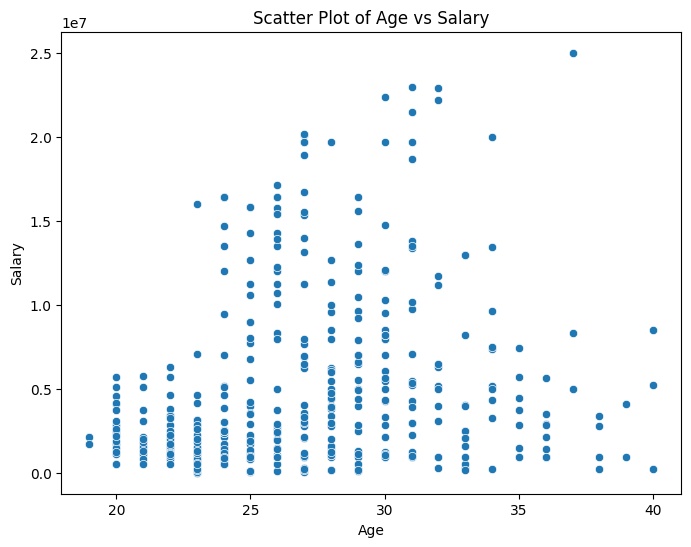

In [16]:
# Step 1: Calculate the correlation between Age and Salary
correlation = my_excel_data['Age'].corr(my_excel_data['Salary'])
print(f"Correlation between Age and Salary: {correlation}")

# Step 2: Visualize the relationship using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Salary', data=my_excel_data)
plt.title("Scatter Plot of Age vs Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()